### Приклад 1. Візуалізація сім'ї первисних кривих

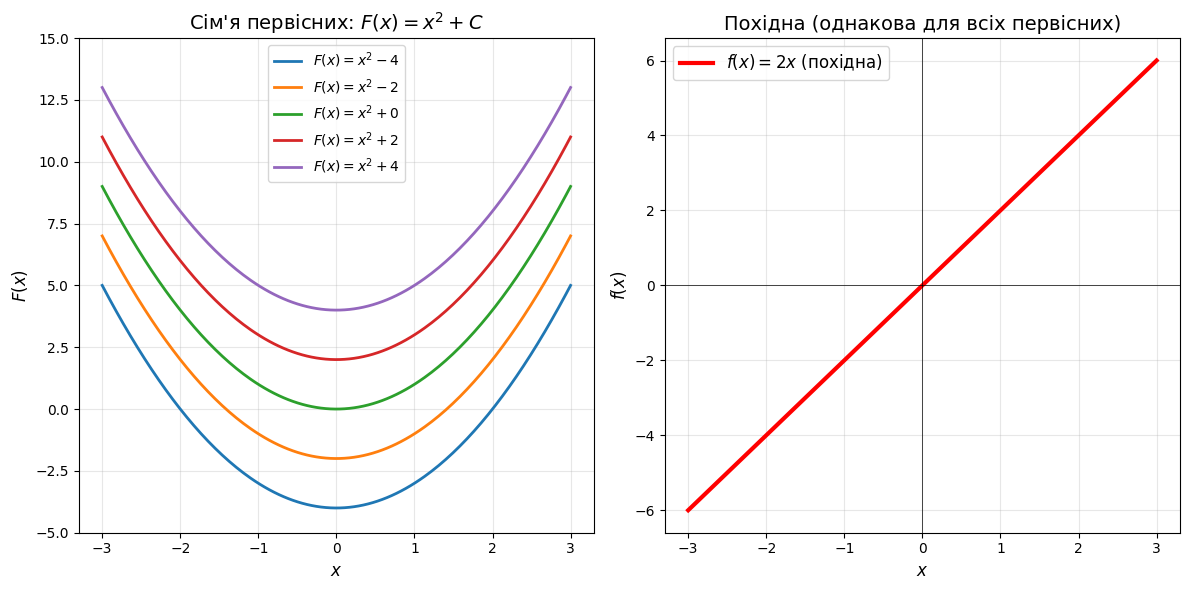

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція f(x) = 2x
def f(x):
    return 2 * x

# Первісна F(x) = x^2 + C
def F(x, C):
    return x**2 + C

# Створення сітки
x = np.linspace(-3, 3, 200)

# Побудова кількох кривих з різними C
plt.figure(figsize=(12, 6))

# Ліва частина: сім'я первісних
plt.subplot(1, 2, 1)
C_values = [-4, -2, 0, 2, 4]
for C in C_values:
    y = F(x, C)
    plt.plot(x, y, linewidth=2, label=f'$F(x) = x^2 {C:+d}$' )

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$F(x)$', fontsize=12)
plt.title('Сім\'я первісних: $F(x) = x^2 + C$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim(-5, 15)

# Права частина: похідна (однакова для всіх кривих)
plt.subplot(1, 2, 2)
y_derivative = f(x)
plt.plot(x, y_derivative, 'r-', linewidth=3, label="$f(x) = 2x$ (похідна)")
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.title('Похідна (однакова для всіх первісних)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

### Приклад 2. Криволінійна трапеція

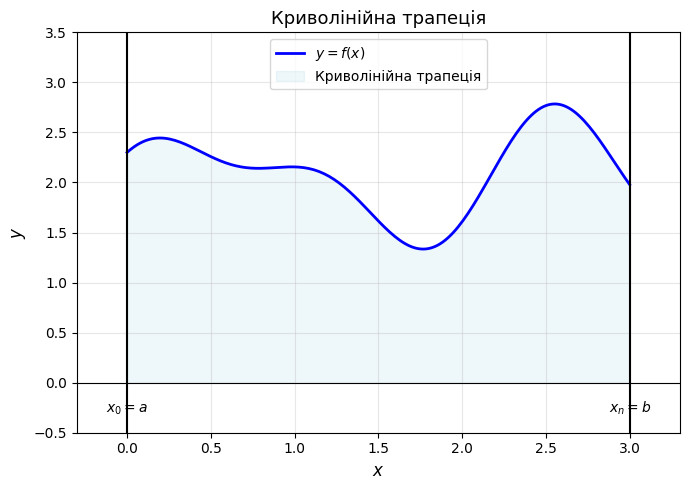

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Плавна крива (схожа на ілюстрацію)
    return 2 + 0.5*np.sin(3*x) + 0.3*np.cos(5*x)

a, b = 0, 3
n = 6  # кількість відрізків

# Точки розбиття (не використовуються для першого графіка, але залишені для повноти)
x_points = np.linspace(a, b, n + 1)

# Вибираємо проміжні точки c_i (не використовуються для першого графіка, але залишені для повноти)
c_i = [(x_points[i] + x_points[i+1]) / 2 for i in range(n)]

# Графік: тепер тільки один підграфік
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# Криволінійна трапеція
x = np.linspace(a, b, 200)
y = f(x)

ax.plot(x, y, 'b-', linewidth=2, label='$y = f(x)$')
ax.fill_between(x, 0, y, alpha=0.2, color='lightblue', label='Криволінійна трапеція')

# Вертикальні межі
ax.axvline(x=a, color='black', linewidth=1.5)
ax.axvline(x=b, color='black', linewidth=1.5)
ax.text(a, -0.3, f'$x_0 = a$', ha='center', fontsize=10)
ax.text(b, -0.3, f'$x_n = b$', ha='center', fontsize=10)

ax.axhline(y=0, color='k', linewidth=0.8)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_title('Криволінійна трапеція', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.3, b + 0.3)
ax.set_ylim(-0.5, 3.5)

plt.tight_layout()
plt.show()


### Приклад 3. Розбивка криволінійної трапеції

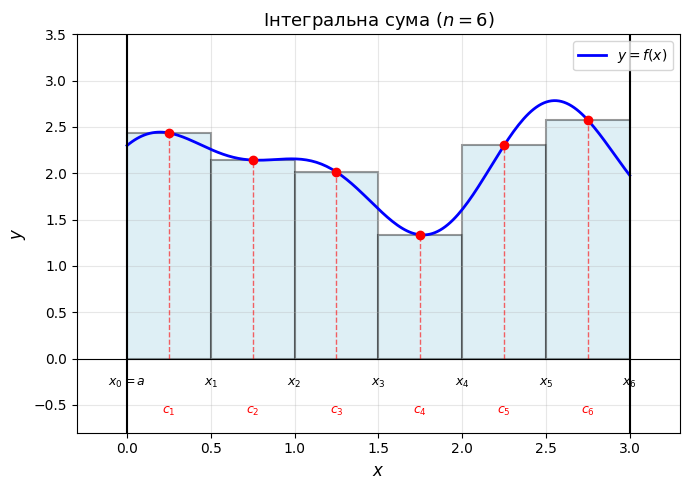

Інтегральна сума для n = 6: 6.4019


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Плавна крива (схожа на ілюстрацію)
    return 2 + 0.5*np.sin(3*x) + 0.3*np.cos(5*x)

a, b = 0, 3
n = 6  # кількість відрізків

# Точки розбиття
x_points = np.linspace(a, b, n + 1)

# Вибираємо проміжні точки c_i (наприклад, середини відрізків)
c_i = [(x_points[i] + x_points[i+1]) / 2 for i in range(n)]

# Графік
# Змінено: тепер лише один підграфік
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

x = np.linspace(a, b, 200)
y = f(x)

ax.plot(x, y, 'b-', linewidth=2, label='$y = f(x)$')

# Малюємо прямокутники
for i in range(n):
    x_left = x_points[i]
    x_right = x_points[i+1]
    width = x_right - x_left
    height = f(c_i[i])

    # Прямокутник
    rect = plt.Rectangle((x_left, 0), width, height,
                         edgecolor='black', facecolor='lightblue',
                         alpha=0.4, linewidth=1.5)
    ax.add_patch(rect)

    # Проміжна точка c_i
    ax.plot(c_i[i], f(c_i[i]), 'ro', markersize=6)

    # Вертикальна пунктирна лінія від осі до точки
    ax.plot([c_i[i], c_i[i]], [0, f(c_i[i])], 'r--', linewidth=1, alpha=0.6)

    # Позначення точок на осі x
    if i == 0:
        ax.text(x_left, -0.3, f'$x_0=a$', ha='center', fontsize=9)
    ax.text(x_right, -0.3, f'$x_{{{i+1}}}$', ha='center', fontsize=9)

    # Позначення c_i під віссю
    ax.text(c_i[i], -0.6, f'$c_{{{i+1}}}$', ha='center', fontsize=9, color='red')

# Вертикальні межі
ax.axvline(x=a, color='black', linewidth=1.5)
ax.axvline(x=b, color='black', linewidth=1.5)

ax.axhline(y=0, color='k', linewidth=0.8)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_title(f'Інтегральна сума ($n = {n}$)', fontsize=13)
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.3, b + 0.3)
ax.set_ylim(-0.8, 3.5)

plt.tight_layout()
plt.show()


### Приклад 4. Наближення інтегральними сумами $f(x)=x^2$

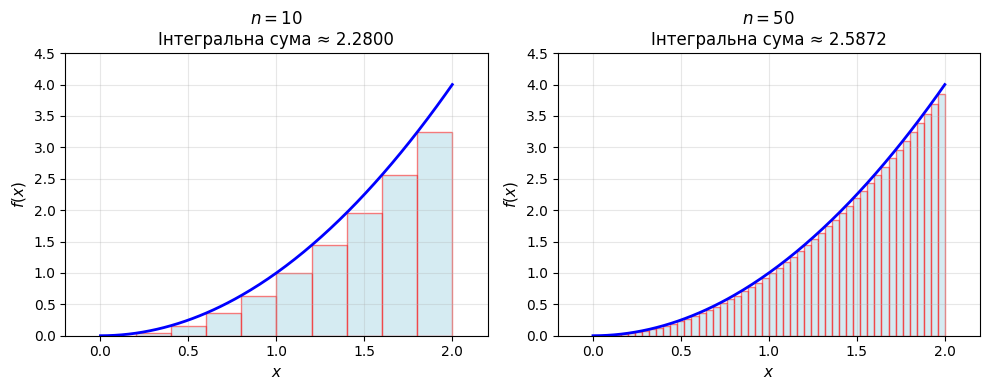

При збільшенні n інтегральна сума наближається до точного значення інтеграла


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

a, b = 0, 2

fig, axes = plt.subplots(1, 2, figsize=(10, 4)) # Змінено на 2 підграфіки

# Різна кількість прямокутників
n_values = [10, 50] # Видалено n = 4

for idx, n in enumerate(n_values):
    ax = axes[idx]

    # Ширина кожного прямокутника
    dx = (b - a) / n

    # Точки розбиття
    x_points = np.linspace(a, b, n + 1)

    # Висоти прямокутників (беремо значення на лівому кінці як c_i)
    for i in range(n):
        x_left = x_points[i]
        height = f(x_left)
        rect = plt.Rectangle((x_left, 0), dx, height,
                            edgecolor='red', facecolor='lightblue', alpha=0.5)
        ax.add_patch(rect)

    # Графік функції
    x = np.linspace(a, b, 200)
    y = f(x)
    ax.plot(x, y, 'b-', linewidth=2)

    # Обчислення інтегральної суми
    integral_sum = sum(f(x_points[i]) * dx for i in range(n))

    ax.set_xlabel('$x$', fontsize=11)
    ax.set_ylabel('$f(x)$', fontsize=11)
    ax.set_title(f'$n = {n}$\nІнтегральна сума ≈ {integral_sum:.4f}', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(a - 0.2, b + 0.2)
    ax.set_ylim(0, 4.5)

plt.tight_layout()
plt.show()

### Приклад 5. Візуалізація площіпід кривою від $a$ до $b$

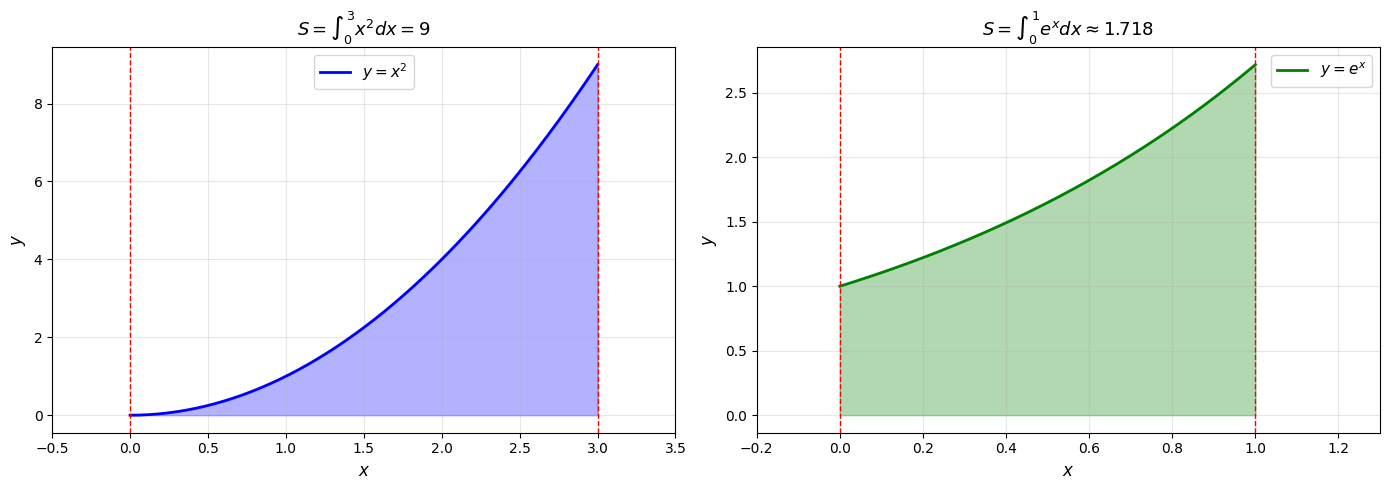

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Приклад 1: y = x^2 на [0, 3]
x1 = np.linspace(0, 3, 200)
y1 = x1**2

# Приклад 2: y = e^x на [0, 1]
x2 = np.linspace(0, 1, 200)
y2 = np.exp(x2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Графік 1
ax1.plot(x1, y1, 'b-', linewidth=2, label='$y = x^2$')
ax1.fill_between(x1, 0, y1, alpha=0.3, color='blue')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=1)
ax1.axvline(x=3, color='red', linestyle='--', linewidth=1)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_title('$S = \\int_0^3 x^2 dx = 9$', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(-0.5, 3.5)

# Графік 2
ax2.plot(x2, y2, 'g-', linewidth=2, label='$y = e^x$')
ax2.fill_between(x2, 0, y2, alpha=0.3, color='green')
ax2.axvline(x=0, color='red', linestyle='--', linewidth=1)
ax2.axvline(x=1, color='red', linestyle='--', linewidth=1)
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.set_title('$S = \\int_0^1 e^x dx \\approx 1.718$', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xlim(-0.2, 1.3)

plt.tight_layout()
plt.show()

### Приклад 6. Візуалізація площі між двома кривими

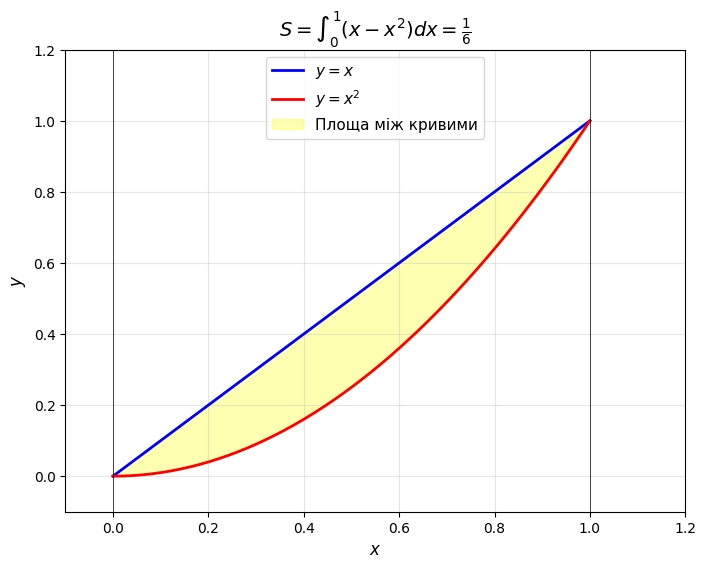

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 200)
y1 = x
y2 = x**2

plt.figure(figsize=(8, 6))
plt.plot(x, y1, 'b-', linewidth=2, label='$y = x$')
plt.plot(x, y2, 'r-', linewidth=2, label='$y = x^2$')
plt.fill_between(x, y2, y1, alpha=0.3, color='yellow', label='Площа між кривими')

plt.axvline(x=0, color='black', linewidth=0.5)
plt.axvline(x=1, color='black', linewidth=0.5)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$S = \\int_0^1 (x - x^2) dx = \\frac{1}{6}$', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(-0.1, 1.2)
plt.ylim(-0.1, 1.2)
plt.show()

### Приклад 7. Метод прямокутників:

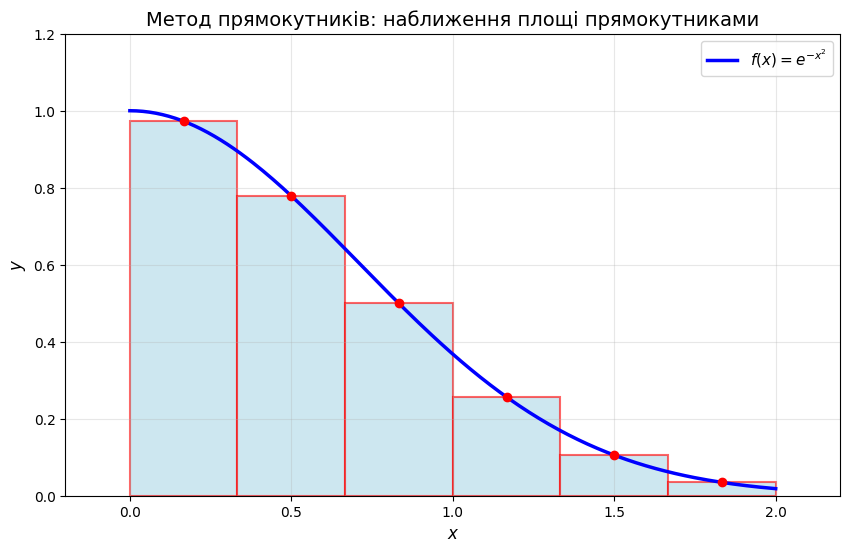

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

a, b = 0, 2
n = 6

x_points = np.linspace(a, b, n + 1)
x = np.linspace(a, b, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2.5, label='$f(x) = e^{-x^2}$')

# Прямокутники (середні точки)
for i in range(n):
    x_mid = (x_points[i] + x_points[i+1]) / 2
    height = f(x_mid)
    width = x_points[i+1] - x_points[i]
    rect = plt.Rectangle((x_points[i], 0), width, height,
                         edgecolor='red', facecolor='lightblue',
                         alpha=0.6, linewidth=1.5)
    plt.gca().add_patch(rect)
    # Точка, в якій обчислюємо висоту
    plt.plot(x_mid, height, 'ro', markersize=6)

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('Метод прямокутників: наближення площі прямокутниками', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(a - 0.2, b + 0.2)
plt.ylim(0, 1.2)
plt.show()

### Приклад 8. Метод трапецій

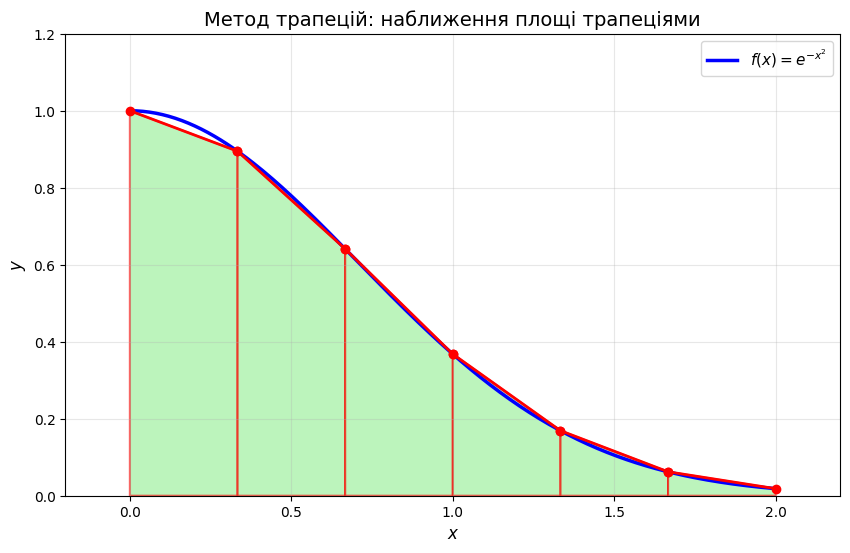

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def f(x):
    return np.exp(-x**2)

a, b = 0, 2
n = 6

x_points = np.linspace(a, b, n + 1)
x = np.linspace(a, b, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2.5, label='$f(x) = e^{-x^2}$')

# Трапеції
for i in range(n):
    x_left = x_points[i]
    x_right = x_points[i+1]
    y_left = f(x_left)
    y_right = f(x_right)

    # Трапеція
    vertices = [(x_left, 0), (x_left, y_left), (x_right, y_right), (x_right, 0)]
    trap = Polygon(vertices, edgecolor='red', facecolor='lightgreen',
                   alpha=0.6, linewidth=1.5)
    plt.gca().add_patch(trap)

    # Пряма лінія зверху трапеції
    plt.plot([x_left, x_right], [y_left, y_right], 'r-', linewidth=2)
    # Точки на кінцях
    plt.plot([x_left, x_right], [y_left, y_right], 'ro', markersize=6)

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('Метод трапецій: наближення площі трапеціями', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(a - 0.2, b + 0.2)
plt.ylim(0, 1.2)
plt.show()

### Приклад 9. Метод Сімпсона

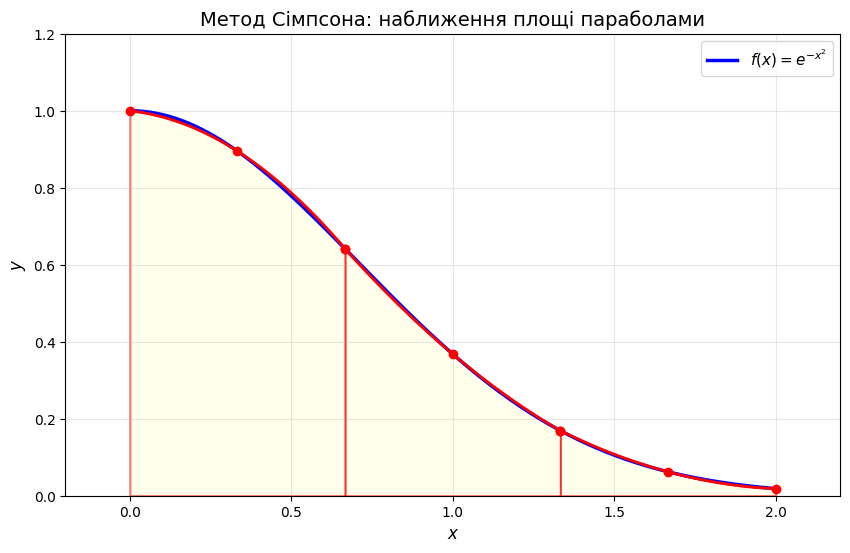

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

a, b = 0, 2
n = 6  # має бути парним для методу Сімпсона

x_points = np.linspace(a, b, n + 1)
x = np.linspace(a, b, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2.5, label='$f(x) = e^{-x^2}$')

# Параболи (обробляємо по дві смужки за раз)
for i in range(0, n, 2):
    x0 = x_points[i]
    x1 = x_points[i+1]
    x2 = x_points[i+2]

    y0 = f(x0)
    y1 = f(x1)
    y2 = f(x2)

    # Будуємо параболу через три точки
    # Парабола: y = ax^2 + bx + c
    # Для спрощення зсунемо координати так, щоб x1 = 0
    h = x1 - x0

    # Коефіцієнти параболи в локальних координатах
    a_coef = (y0 - 2*y1 + y2) / (2*h**2)
    b_coef = (y2 - y0) / (2*h)
    c_coef = y1

    # Будуємо параболу
    x_parabola = np.linspace(x0, x2, 50)
    y_parabola = a_coef * (x_parabola - x1)**2 + b_coef * (x_parabola - x1) + c_coef

    # Заповнюємо область під параболою
    plt.fill_between(x_parabola, 0, y_parabola, alpha=0.6, color='lightyellow',
                     edgecolor='red', linewidth=1.5)

    # Сама парабола
    plt.plot(x_parabola, y_parabola, 'r-', linewidth=2)

    # Три точки
    plt.plot([x0, x1, x2], [y0, y1, y2], 'ro', markersize=6)

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('Метод Сімпсона: наближення площі параболами', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(a - 0.2, b + 0.2)
plt.ylim(0, 1.2)
plt.show()

### Приклад 10. Обчислимо інтеграл $\int_0^2 x^2 \, dx$

In [ ]:
import numpy as np
from scipy.integrate import quad

# Функція
def f(x):
    return x**2

# Обчислення інтеграла
result, error = quad(f, 0, 2)

print(f"Результат: {result}")
print(f"Похибка: {error:.2e}")

Результат: 2.666666666666667
Похибка: 2.96e-14


Візуалізація прикладу

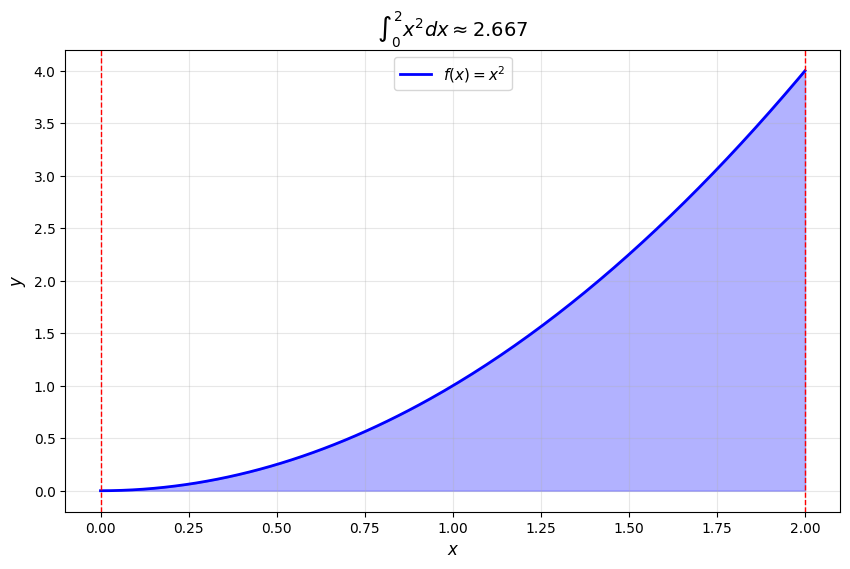

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

x = np.linspace(0, 2, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^2$')
plt.fill_between(x, 0, y, alpha=0.3, color='blue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=2, color='red', linestyle='--', linewidth=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$\\int_0^2 x^2 dx \\approx 2.667$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.show()

### Приклад 11. Обчислимо інтеграл від функції Гауса $\int_0^2 e^{-x^2} \, dx$.

In [ ]:
from scipy.integrate import quad
import numpy as np

def f(x):
    return np.exp(-x**2)

result, error = quad(f, 0, 2)

print(f"Інтеграл від функції Гауса = {result:.10f}")
print(f"Оцінка похибки: {error:.2e}")

Інтеграл від функції Гауса = 0.8820813908
Оцінка похибки: 9.79e-15


Візуалізація прикладу

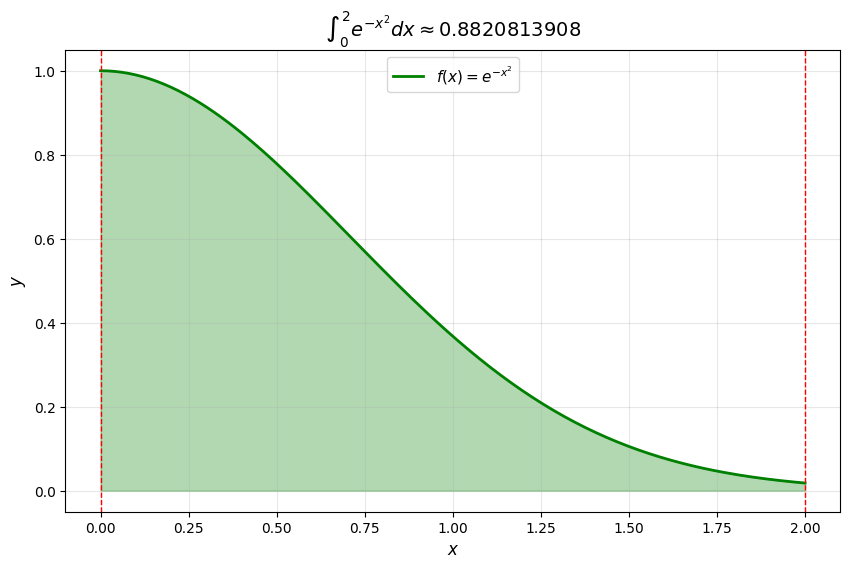

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

x = np.linspace(0, 2, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'g-', linewidth=2, label='$f(x) = e^{-x^2}$')
plt.fill_between(x, 0, y, alpha=0.3, color='green')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=2, color='red', linestyle='--', linewidth=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$\\int_0^2 e^{-x^2} dx \\approx 0.8820813908$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.show()

### Приклад 12. Обчислимо інтеграл $\int_0^{\pi} \sin x \, dx$.

In [ ]:
from scipy.integrate import quad
import numpy as np

def f(x):
    return np.sin(x)

result, error = quad(f, 0, np.pi)

print(f"Чисельно: {result}")
print(f"Оцінка похибки: {error:.2e}")

Чисельно: 2.0
Оцінка похибки: 2.22e-14


Візуалізація прикладу

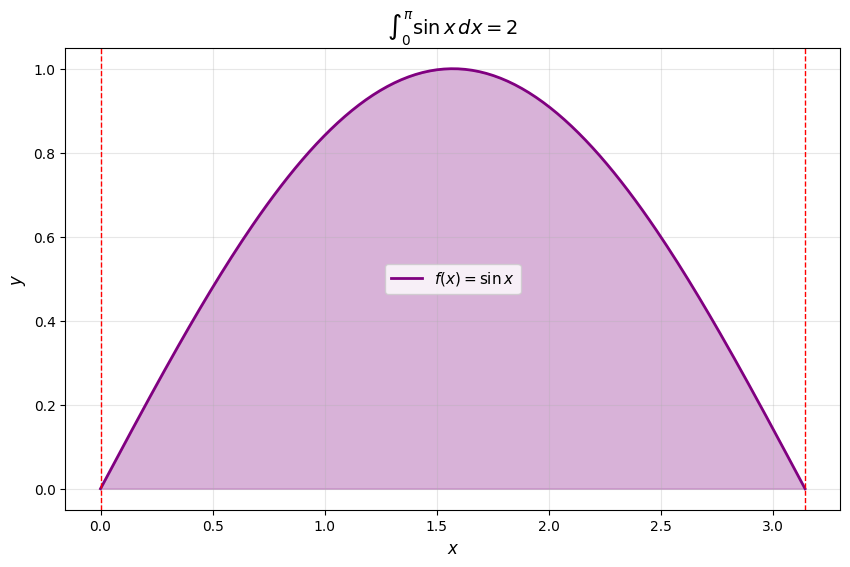

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.linspace(0, np.pi, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'purple', linewidth=2, label='$f(x) = \\sin x$')
plt.fill_between(x, 0, y, alpha=0.3, color='purple')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=np.pi, color='red', linestyle='--', linewidth=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$\\int_0^{\\pi} \\sin x \\, dx = 2$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.show()

### Приклад 13. Функція sinc: $\int_0^{10} \cfrac{\sin x}{x} \, dx$

In [ ]:
from scipy.integrate import quad
import numpy as np

def sinc(x):
    if x == 0:
        return 1.0
    return np.sin(x) / x

result, error = quad(sinc, 0, 10)

print(f"sinc = {result:.10f}")
print(f"Оцінка похибки: {error:.2e}")

sinc = 1.6583475942
Оцінка похибки: 2.86e-14


Візуалізація прикладу

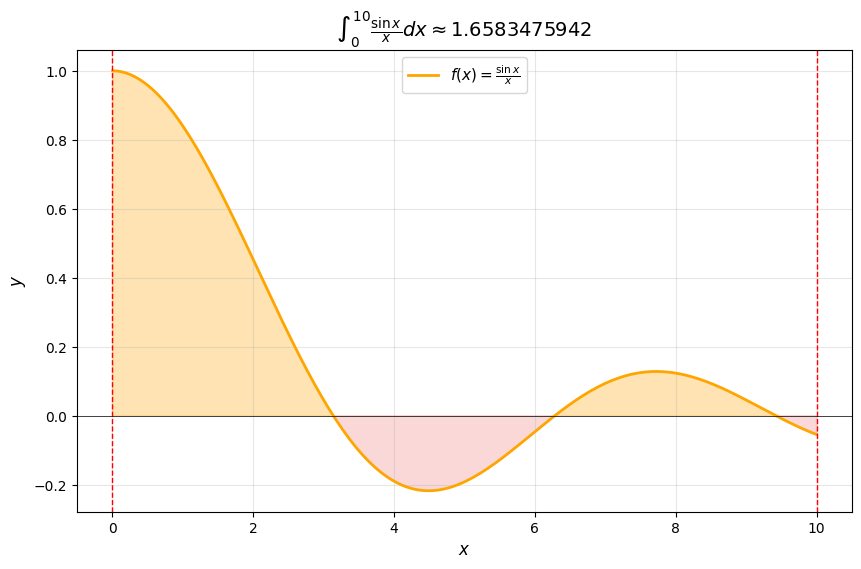

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    # Уникаємо ділення на нуль
    return np.where(x == 0, 1.0, np.sin(x) / x)

x = np.linspace(0.01, 10, 200)  # починаємо з 0.01, щоб уникнути проблем
y = sinc(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'orange', linewidth=2, label='$f(x) = \\frac{\\sin x}{x}$')
plt.fill_between(x, 0, y, where=(y >= 0), alpha=0.3, color='orange', interpolate=True)
plt.fill_between(x, 0, y, where=(y < 0), alpha=0.3, color='lightcoral', interpolate=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=10, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$\\int_0^{10} \\frac{\\sin x}{x} dx \\approx 1.6583475942$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(-0.5, 10.5)
plt.show()

### Приклад 14. Обчислення площі між кривими $y = x^2$ і $y = x$ на відрізку $[0, 1]$.

In [ ]:
from scipy.integrate import quad
import numpy as np

# Функції
def f1(x):
    return x

def f2(x):
    return x**2

# Модуль різниці функцій
def area_between(x):
    return np.abs(f1(x) - f2(x))

# Межі інтегрування
a, b = 0, 1

# Обчислення інтеграла
result, error = quad(area_between, a, b)

print(f"Чисельно: {result}")
print(f"Похибка: {error:.2e}")

Чисельно: 0.16666666666666666
Похибка: 1.85e-15


### Приклад 15. Обчислимо інтеграл $\int_0^{\infty} e^{-x} \, dx$.

In [ ]:
from scipy.integrate import quad
import numpy as np

def f(x):
    return np.exp(-x)

# Нескінченна верхня межа
result, error = quad(f, 0, np.inf)

print(f"Чисельно: {result}")
print(f"Похибка: {error:.2e}")

Чисельно: 1.0000000000000002
Похибка: 5.84e-11


Візуалізація

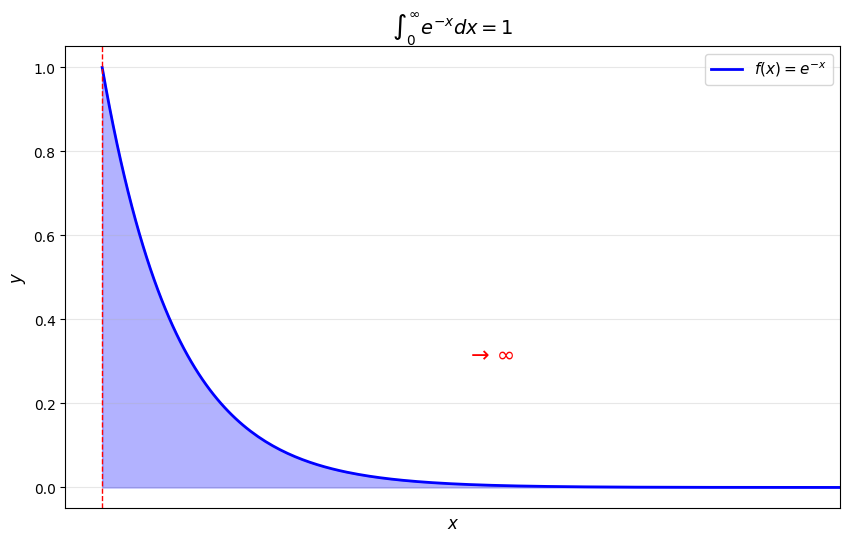

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x)

# Для візуалізації беремо великий, але скінченний проміжок
x = np.linspace(0, 10, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='$f(x) = e^{-x}$'
)
plt.fill_between(x, 0, y, alpha=0.3, color='blue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title(r'$\int_0^{\infty} e^{-x} dx = 1$', fontsize=14)
plt.text(5, 0.3, '→ ∞', fontsize=16, color='red')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(-0.5, 10)
plt.xticks([]) # Removed x-axis ticks
plt.show()

### Приклад 16. Обчислимо інтеграл $\int_1^{\infty} \cfrac{1}{x^2} \, dx$.

In [ ]:
from scipy.integrate import quad
import numpy as np

def f(x):
    return 1 / x**2

result, error = quad(f, 1, np.inf)

print(f"Чисельно: {result}")
print(f"Похибка: {error:.2e}")

Чисельно: 1.0
Похибка: 1.11e-14


Візуалізація

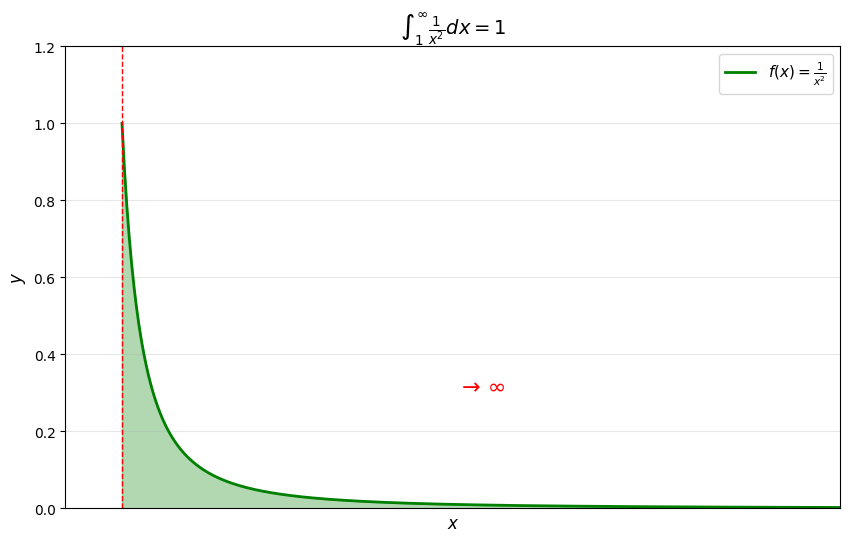

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / x**2

x = np.linspace(1, 20, 300)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'g-', linewidth=2, label='$f(x) = \\frac{1}{x^2}$')
plt.fill_between(x, 0, y, alpha=0.3, color='green')
plt.axvline(x=1, color='red', linestyle='--', linewidth=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$\\int_1^{\\infty} \\frac{1}{x^2} dx = 1$', fontsize=14)
plt.text(10, 0.3, '→ ∞', fontsize=16, color='red')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(-0.5, 20)
plt.xticks([]) # Removed x-axis ticks
plt.ylim(0, 1.2)
plt.show()

### Приклад 17. Спробуємо обчислити інтеграл $\int_1^{\infty} \frac{1}{x} \, dx$.

In [ ]:
from scipy.integrate import quad
import numpy as np

def f(x):
    return 1 / x

result, error = quad(f, 1, np.inf)

print(f"Результат: {result}")
print(f"Похибка: {error}")

Результат: 40.996012819169536
Похибка: 8.156214940493651


/tmp/ipython-input-2723939662.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(f, 1, np.inf)


Візуалізація

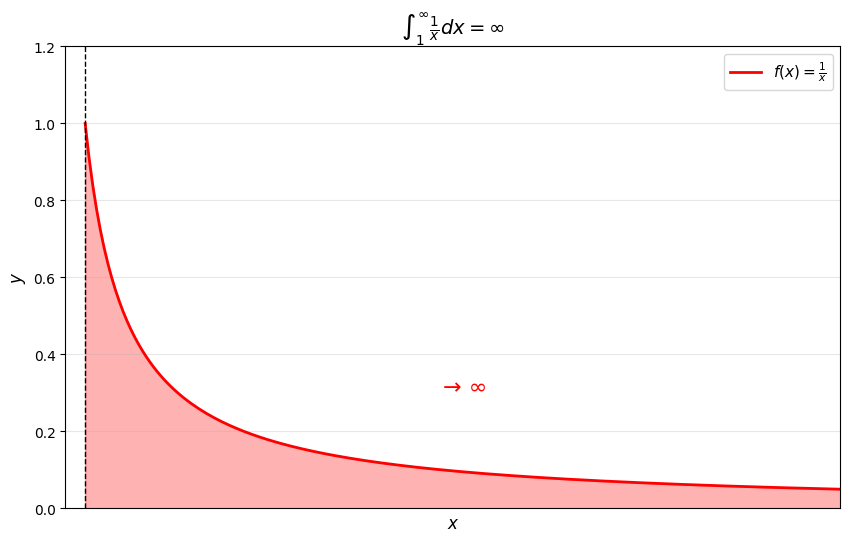

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / x

x = np.linspace(1, 20, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', linewidth=2, label='$f(x) = \\frac{1}{x}$')
plt.fill_between(x, 0, y, alpha=0.3, color='red')
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('$\\int_1^{\\infty} \\frac{1}{x} dx = \\infty$', fontsize=14)
plt.text(10, 0.3, '→ ∞', fontsize=16, color='red')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(0.5, 20)
plt.xticks([]) # Removed x-axis ticks
plt.ylim(0, 1.2)
plt.show()